
## 특징 
- 표(테이블) 데이터를 다루는데 특화 
- 다양한 외부소스에서 데이터 가져오기 (csv,excel,SQL db)
- 데이터 정제, 변환, 분석에 필요한 기능 다수 
- 결측치 처리, 그룹화, 병합 작업에 효율 


In [ ]:
import numpy as np 
import pandas as pd 
#Numpy 배열
np_array= np.arange(1,10).reshape(3,3)
print(np_array)
#넘파이는 배열 처리 시계열은 시간의 흐름을 담고 있는데이터를 해석한다는 의미 판다스는 표 array는 numpy  판다스는 numpy 에 의존한다. 
df = pd.DataFrame(np_array, columns =['A', 'B', 'C'])
print(df)

## Series
- 1차원 배열 (벡터) with 레이블 


In [ ]:
import pandas as pd

# 기본 Seires 생성 (별말 없으면 숫자 index)
s1 = pd.Series([1, 3, 5, 7, 9])
print(s1)

# 인덱스 지정
s2 = pd.Series([1, 3, 5, 7, 9], index=['a', 'b', 'c', 'd', 'e'])
print(s2)

# dict로 생성
d = {'a': 1, 'b': 2, 'c': 3}
s3 = pd.Series(d)
print(s3)

# 단일값(스칼라)으로 Series 생성
s4 = pd.Series(5, index=['a', 'b', 'c'])
print(s4)


In [ ]:
print(s2)
# 값
print(s2.values)
# 인덱스
print(s2.index)
# 데이터타입
print(s2.dtype)
# 차원
print(s2.ndim)
# 크기
print(s2.size)
# 모양
print(s2.shape)

# 앞에 2개
print(s2.head(2))
# 뒤에 3개
print(s2.tail(3))
# 통계 요약
print(s2.describe())

## DaraFrmae 
- 2차원(매트릭스)with Label
- 행(row)와 열(col)모두에 Label 설정


In [ ]:
# 딕셔너리로부터 DataFrame 생성
data = {
    '이름': ['김철수', '이영희', '박민수', '정지영'],
    '나이': [25, 28, 22, 30],
    '성별': ['남', '여', '남', '여'],
    '점수': [85, 92, 78, 90]
}
df1 = pd.DataFrame(data)
print("딕셔너리로부터 DataFrame 생성:")
print(df1)

# 리스트의 리스트로부터 DataFrame 생성 (데이터 섞인 것은 numpy 에서는 불가함)
data_list = [
    ['김철수', 25, '남', 85],
    ['이영희', 28, '여', 92],
    ['박민수', 22, '남', 78],
    ['정지영', 30, '여', 90]
]
df2 = pd.DataFrame(data_list, columns=['이름', '나이', '성별', '점수'])
print("\n리스트로부터 DataFrame 생성:")
print(df2)

In [ ]:
# Column 정보
print(df1.columns)
# 인덱스(Row 정보)
print(df1.index)
# 값
print(df1.values)
# 데이터 타입
print(df1.dtypes)
# 크기
print(df1.size)
# 모양
print(df1.shape)

In [ ]:
print(df1.head(2))

print(df1.tail(2))

print(df1.describe())

print(df1['점수'].describe())


In [ ]:
# Index(데이터 레코드 별 PK)는 Pandas 의 핵심 기능

# 인덱스 재설정 (0 ~ N으로 인덱스 설정)
df_reset = df1.reset_index()
print(df_reset)

# 인덱스 설정
df_set = df1.set_index('이름')
print(df_set)

# 다중 인덱스 설정
df_multi = df1.set_index(['성별', '이름'])
print(df_multi)

# 인덱스 이름 변경
df_renamed = df_set.rename_axis('학생명')
print(df_renamed)

## 데이터 접근 및 선택
### 열선택과 인덱스 접근

In [ ]:
# DF 에서 단일 열(col) 선택

name_col = df1['이름']
print(name_col)  # Series 가 나온다.

# 다중 열 선택
subset = df1[ ['이름', '점수'] ]
print(subset)  # DataFrame 이 나온다.

# key 접근이 아니라 속성(주어.속성) 방식 접근 - 공백/특수문자 없을경우
print(df1.나이)

# 행 선택 (인덱스 기준)
print(df1[:2])  # 맨 앞 레코드 2개 




print(df1.나이)


###loc 와 iloc
loc : 레이블 기반 인덱싱(인덱스 이름 사용)
iloc : 위치 기반 인덱싱(정수 위치 사용)

In [ ]:
# loc 예제

df3 = df1.set_index('이름')

# 단일 행 선택
row = df3.loc['김철수']
print(row)

# 여러 행 선택
rows = df3.loc[ ['김철수', '이영희'] ]
print(rows)

# row + col 조합으로 선택
data = df3.loc[ ['김철수', '이영희'], ['나이', '점수'] ]

In [ ]:
#iloc 예제 
print(df1) #인덱스 설정 없음

# 단일 행 ->이거 아님 df
first_row =-df1.iloc[0] #df1[1:3]와 같으나 iloc사용
print(first_row)

#다중 행 
rows = df3.iloc[1:3]
print(rows)
#행 + 열 선택
data =df1.iloc[[]] #0,2 sms 레코드(행:로우) 번호 구요, 1,3은 col 번호이다. 
print(data)

### boolean 인덱싱 


In [ ]:
print(df1)
print()
# 나이 25 초과 마스킹
mask = df1['나이'] > 25  # T, F로 이루어진 Series
print(mask)
print()
# 필터링
filtered = df1[mask]
print(filtered)
print()

# 점수 80이상, 성별 '여'
mask = (df1['점수'] >= 80) & (df1['성별'] == '여')
print(df1[mask])
print()
#남성이거나, 점수 90이상 
mask =df1['점수']>=92| (df1['성별']=='남')
print (df1[mask])

#쿼리메서드로 필터링 
print(df1.query('나이>=25 and 점수>85'))

# isin 메서드로 필터링
names = ['김철수', '정지영']
mask = df1['이름'].isin(names)
print(df1[mask])




In [ ]:
### 눈으로 확인하는 용도
print(df1.describe())
#print(df1['점수'].describe()) #데이터 프레임과 시리즈를 주어로 둔다 차이점이 이거임. np.median 에서 np 는 함수이다. 
print(df1)
#개별 통계 함수 
print(df1['점수'].mean())
print(df1['점수'].median())
print(df1['점수'].std())
print(df1['점수'].min())
print(df1['점수'].max())
print(df1['점수'].sum())

#범주형 col 빈도 계산 
print(df1['성별'].value_counts())



## 데이터 요약 및 그룹화

In [ ]:
#df1 표에서 성별로 그루핑하고, 점수의 평균집계 

stat= gender_score= df1.groupby('성별')['점수'].mean() 
print(gender_score)

#데이터 프레임과 시리즈의 차이 
#성별에 따른 여러 통계량
df1.groupby('성별').agg({
    '나이': ['mean', 'min', 'max'],
    '점수': ['mean', 'min', 'max','std']
})
stat


In [ ]:
%pip install matplotlib

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
df1.plot(kind ='bar')

In [ ]:
#막대그래프
df1.plot(kind= 'bar',)

In [ ]:
gender_score.plot(kind='bar')
plt.title('성별 평균 점수')
plt.xlabel('성별')
plt.ylabel('평균점수')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 온라인 쇼핑몰 고객 데이터 (가상)
customer_data = {
    '고객ID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    '이름': ['김민수', '이지영', '박철호', '정수민', '최영희', '강도현', '윤서연', '임태혁', '송지원', '한미래'],
    '나이': [25, 32, 28, 35, 29, 31, 26, 33, 27, 30],
    '성별': ['남', '여', '남', '여', '여', '남', '여', '남', '여', '여'],
    '구매금액': [50000, 75000, 32000, 98000, 67000, 84000, 41000, 72000, 58000, 89000],
    '구매횟수': [3, 5, 2, 7, 4, 6, 2, 5, 3, 6],
    '회원등급': ['실버', '골드', '브론즈', '플래티넘', '골드', '골드', '실버', '골드', '실버', '플래티넘']
}

df = pd.DataFrame(customer_data)
print("온라인 쇼핑몰 고객 데이터:")
print(df)

In [ ]:
#컬럼별 요약 통계 
#print(df.describe())
#성별 별 고객 수 
print(df['성별'].value_counts())
#회원등급별 평균 구매금액 


In [153]:
# 데이터 정보 확인 (행 개수, 열 개수, 컬럼명)
len(df) #행 개수 
df.shape[0]
len(df.columns)
print(df.shape[1]) #열개수 
df.columns
print("행 개수:", df.shape[0])
print("열 개수:", df.shape[1])
print("컬럼명:", list(df.columns))
# 데이터 타입 확인
df.dtypes
df.info()
# 기술 통계 요약
df.describe()
# 범주형 데이터 빈도 (성별 카운트, 등급 카운트)
#1. 성별빈도 
df['성별'].value_counts()
#2.회원등급 빈도 
df['회원등급'].value_counts


7
행 개수: 10
열 개수: 7
컬럼명: ['고객ID', '이름', '나이', '성별', '구매금액', '구매횟수', '회원등급']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    10 non-null     int64 
 1   이름      10 non-null     object
 2   나이      10 non-null     int64 
 3   성별      10 non-null     object
 4   구매금액    10 non-null     int64 
 5   구매횟수    10 non-null     int64 
 6   회원등급    10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


<bound method IndexOpsMixin.value_counts of 0      실버
1      골드
2     브론즈
3    플래티넘
4      골드
5      골드
6      실버
7      골드
8      실버
9    플래티넘
Name: 회원등급, dtype: object>

In [152]:
# 1. 특정 열 선택
print("1. 이름과 구매금액만 선택:")
a1= df[['이름','구매금액']]
print(a1)

# 2. 조건부 필터링
print("\n2. 구매금액이 70000원 이상인 고객:")
a2=df[df['구매금액']>=70000]
print(a2)
# 3. 다중 조건 필터링
print("\n3. 여성이면서 구매횟수가 4회 이상인 고객:")
# 조건1: 성별 == '여'
# 조건2: 구매횟수 >= 4
a3 = df[(df['성별'] == '여') & (df['구매횟수'] >= 4)]
print(a3) 
# 4. 특정 값들로 필터링
print("\n4. 골드 또는 플래티넘 회원:") #isin 은 리스트 형태로 사용되고 해당 값이 리스트 안에 초함되어 있는지를 반환해 준단
a5 = df['회원등급'].isin(['골드', '플래티넘'])
print(a5) 
a6 = df[(df['회원등급'] == '플래티넘') | (df['회원등급'] == '골드') ]
print(a6)


1. 이름과 구매금액만 선택:
    이름   구매금액
0  김민수  50000
1  이지영  75000
2  박철호  32000
3  정수민  98000
4  최영희  67000
5  강도현  84000
6  윤서연  41000
7  임태혁  72000
8  송지원  58000
9  한미래  89000

2. 구매금액이 70000원 이상인 고객:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
1  1002  이지영  32  여  75000     5    골드
3  1004  정수민  35  여  98000     7  플래티넘
5  1006  강도현  31  남  84000     6    골드
7  1008  임태혁  33  남  72000     5    골드
9  1010  한미래  30  여  89000     6  플래티넘

3. 여성이면서 구매횟수가 4회 이상인 고객:
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
1  1002  이지영  32  여  75000     5    골드
3  1004  정수민  35  여  98000     7  플래티넘
4  1005  최영희  29  여  67000     4    골드
9  1010  한미래  30  여  89000     6  플래티넘

4. 골드 또는 플래티넘 회원:
0    False
1     True
2    False
3     True
4     True
5     True
6    False
7     True
8    False
9     True
Name: 회원등급, dtype: bool
   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
1  1002  이지영  32  여  75000     5    골드
3  1004  정수민  35  여  98000     7  플래티넘
4  1005  최영희  29  여  67000     4    골드
5  1006  강도현  31  남  84000     6    골드


In [159]:
# #안배웠지만 적용해보기 

# # 구매금액 기준 정렬 정렬은 sort 이용 
# print("구매금액 기준 내림차순 정렬:")
# a10 = df.sort_values(by='구매금액', ascending=False)
# print(a10)
# # 여러 기준으로 정렬 ()
a11 = df.sort_values(by=['회원등급','구매금액'],ascending=[True,False])
print(a11)
# print("\n회원등급별, 구매금액별 정렬:")

   고객ID   이름  나이 성별   구매금액  구매횟수  회원등급
5  1006  강도현  31  남  84000     6    골드
1  1002  이지영  32  여  75000     5    골드
7  1008  임태혁  33  남  72000     5    골드
4  1005  최영희  29  여  67000     4    골드
2  1003  박철호  28  남  32000     2   브론즈
8  1009  송지원  27  여  58000     3    실버
0  1001  김민수  25  남  50000     3    실버
6  1007  윤서연  26  여  41000     2    실버
3  1004  정수민  35  여  98000     7  플래티넘
9  1010  한미래  30  여  89000     6  플래티넘


In [ ]:
# # 금액 계산 (평균, 중앙, 최소, 최대, 표준편차)
# print("구매금액 통계:")
b1= df['구매금액'].describe()
print(b1)
# # 횟수 계산 (평균, 중앙, 최소, 최대, 표준편차)
b2 = df['구매횟수'].describe()
print(b2)
# print("\n구매횟수 통계:")
상#상위/하위
print (df.blargest(2. '구매금액'))
print(df)

count       10.000000
mean     66600.000000
std      21323.956272
min      32000.000000
25%      52000.000000
50%      69500.000000
75%      81750.000000
max      98000.000000
Name: 구매금액, dtype: float64
count    10.000000
mean      4.300000
std       1.766981
min       2.000000
25%       3.000000
50%       4.500000
75%       5.750000
max       7.000000
Name: 구매횟수, dtype: float64


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

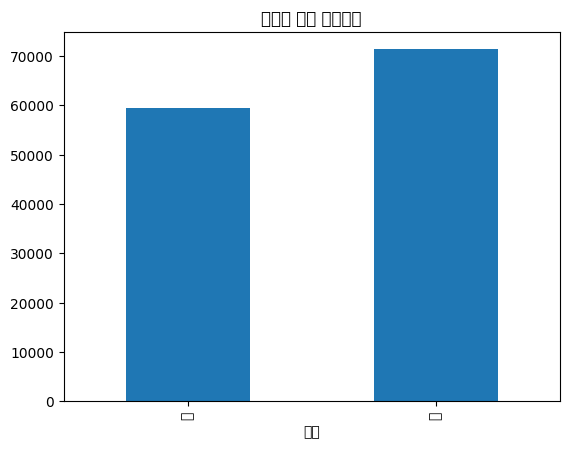

In [ ]:
# # 성별별(Group) 기본 분석  
# print("성별별 분석:")
df.groupby('성별').describe()

print(fender_group ['구매금액'].agg(['count','mean'])
      print(result.rename)
# print('\n횟수, 평균 통계:')
#성별 별로 구매금액, 구매횟 수 통계 내기
df.groupby('성별')['구매금액'].mean().plot(kind='bar', title='성별별 평균 구매금액')
plt.show()
# print('\n평균 구매 횟수')

In [ ]:
# 등급별(Group) 기본분석
print('회원 등급별 평균 구매 금액 분석')

## 결측치 확인



In [4]:
import numpy as np 
import pandas as pd 
# 결측치 처리 
data = {
    '이름': ['김철수', '이영희', '박민수', np.nan, '정지영'],
    '나이': [25, 28, np.nan, 30, 22],
    '성별': ['남', '여', '남', np.nan, '여'],
    '직업': ['회사원', np.nan, '자영업', '공무원', '회사원'],
    '급여': [3500, 4200, np.nan, 3800, 3200]
} 
df = pd.DataFrame(data)

df

,이름,나이,성별,직업,급여
0,김철수,25.0,남,회사원,3500.0
1,이영희,28.0,여,NaN,4200.0
2,박민수,NaN,남,자영업,NaN
3,NaN,30.0,NaN,공무원,3800.0
4,정지영,22.0,여,회사원,3200.0


In [19]:
print('original',df)
#결측치 자체를 확인 
print(df.isna(),df.isnull()) #완전히 똑같은 문법

#결측치 총 개수 
df.isna().sum # 각 열별 결측치 개수 열마다 ㅅTrue 개수를 센다. 
#df.sum() #안되는 것들 생김 
df['급여'].sum() #갯수가 아닌 True를 1로 생각함 
df.isna().mean()*100

# df의 정보 (dv 스키마 확인과 비슷하다. )
df.info
# 결측치가 포함된 행을 확인 
df.isna().any() #axis =0을 써주는게 확실함 

# 결측치가 포함된 행을 확인 
m1= df.isna().any(axis=1)

#결측치가 없는 행을 확인 
m2= df.notna().all(axis=1) #하나도 결측치가 없다 => True가 꽉찬것 
df[m1]
df[m2]



original     이름    나이   성별   직업      급여
0  김철수  25.0    남  회사원  3500.0
1  이영희  28.0    여  NaN  4200.0
2  박민수   NaN    남  자영업     NaN
3  NaN  30.0  NaN  공무원  3800.0
4  정지영  22.0    여  회사원  3200.0
      이름     나이     성별     직업     급여
0  False  False  False  False  False
1  False  False  False   True  False
2  False   True  False  False   True
3   True  False   True  False  False
4  False  False  False  False  False       이름     나이     성별     직업     급여
0  False  False  False  False  False
1  False  False  False   True  False
2  False   True  False  False   True
3   True  False   True  False  False
4  False  False  False  False  False


,이름,나이,성별,직업,급여
0,김철수,25.0,남,회사원,3500.0
4,정지영,22.0,여,회사원,3200.0


## 결측치 삭제

In [22]:
#결측치가 있는 모든 행을 삭제 하나라도 있다면!!(새로 리턴)
df.dropna(axis=0)

#틀정 열의 결측치가 있는 행만 삭제 (이름과 성별이 없는 행은 삭제)
df.dropna(subset=['이름','성별'],axis=0)

#모든 값이 결측치면 삭제 
df.dropna(how ='all',axis =0)

#결측치가 있는 모든 열을 삭제 
df.dropna(axis=1)
 


""
0
1
2
3
4


## 결측치 채우기

In [30]:
# 특정 값으로 결측치 채우기 
df.fillna(0)

# 열별로 다른 값 쓰기 
fill_values = {
    '이름': '익명',
    '나이': 20,
    '성별': '기타',
    '급여': df['급여'].mean()
} ##여기 까지 딕셔너리

df.fillna(fill_values)

#앞/뒤 사람데이터 복붙 랜덤도 방법이지만.. 
# 케글에서 점수에 큰영향을 주는 것은 벤치마크 
df.fillna(method='ffill') #과거버전 용 미래에는 에러남 
df.ffill() #앞사람데이터
df.bfill() #과거버전 





/var/folders/98/vj3q9b254k79y681ng12dddh0000gn/T/ipykernel_28210/3119367538.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill') #과거


,이름,나이,성별,직업,급여
0,김철수,25.0,남,회사원,3500.0
1,이영희,28.0,여,자영업,4200.0
2,박민수,30.0,남,자영업,3800.0
3,정지영,30.0,여,공무원,3800.0
4,정지영,22.0,여,회사원,3200.0


In [31]:
#시계열 데이터
dates = pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-05', '2023-01-10'])
data = [1, np.nan, np.nan, 10]

time_data = pd.DataFrame({'value': data}, index=dates)

2023-01-01     1.0
2023-01-02     2.0
2023-01-03     NaN
2023-01-04     4.0
2023-01-05     5.0
2023-01-06     NaN
2023-01-07     NaN
2023-01-08     8.0
2023-01-09     9.0
2023-01-10    10.0
Freq: D, dtype: float64

In [35]:
# 보간법(알려진 값으로 모르는 것을 추정한다)

# 선형보간법(1차 함수를 그려서 추정)-> 시간의 흐름은 고려하지 않음 
time_data.interpolate(method='linear') 

#시간 기반 -> 시간의 흐름까지 고려하여 채움 
time_interp= time_data.interpolate(method='time')
